In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#Number of matches won by each team in IPL history
path=r"D:/EDA/New folder/IPL Data"
os.chdir(path)
os.listdir(path)

['.ipynb_checkpoints',
 'Ball_by_Ball.xlsx',
 'Call Centre Analysis- Data set.rar',
 'Calling Data.xlsx',
 'Calling_Data.ipynb',
 'Cars.xlsx',
 'Enrollment Data.xlsx',
 'ID Table.xlsx',
 'IPL data analysis.ipynb',
 'Leads.xlsx',
 'Match.xlsx',
 'Player.xlsx',
 'Player_Match.xlsx',
 'Quiz1.ipynb',
 'Season.xlsx',
 'Team.xlsx',
 'Univariate Analysis.ipynb',
 'Univariate for numerical data',
 'Untitled.ipynb']

In [4]:
!pip install pandas

In [6]:
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player=pd.read_excel("Player.xlsx")
player_match=pd.read_excel("Player_match.xlsx")
season=pd.read_excel("Season.xlsx")
team=pd.read_excel("Team.xlsx")

In [267]:
#1)Cross table-One way cross tab[using one column]
won_match=pd.crosstab(index=match['Match_Winner_Id'],columns='count1').reset_index()
won_match

col_0,Match_Winner_Id,count1
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [10]:
list(won_match)

['Match_Winner_Id', 'count']

In [86]:
Team_wise_win=pd.merge(won_match,team[["Team_Id","Team_Short_Code"]],left_on="Match_Winner_Id",right_on="Team_Id")
Team_wise_win

,Match_Winner_Id,count,Team_Id,Team_Short_Code
0,1.0,68,1,KKR
1,2.0,70,2,RCB
2,3.0,79,3,CSK
3,4.0,63,4,KXIP
4,5.0,63,5,RR
5,6.0,56,6,DD
6,7.0,80,7,MI
7,8.0,29,8,DC
8,9.0,6,9,KTK
9,10.0,12,10,PW


In [87]:
Team_wise_win=Team_wise_win[["Team_Short_Code","count"]]
Team_wise_win.sort_values(by="count",ascending=False)

,Team_Short_Code,count
6,MI,80
2,CSK,79
1,RCB,70
0,KKR,68
3,KXIP,63
4,RR,63
5,DD,56
10,SRH,34
7,DC,29
9,PW,12


In [88]:
Total_match_at_home=pd.crosstab(index=match['Team_Name_Id'],columns="Home_Match").reset_index()
Total_match_at_home

col_0,Team_Name_Id,Home_Match
0,1,62
1,2,78
2,3,74
3,4,65
4,5,52
5,6,69
6,7,62
7,8,39
8,9,7
9,10,23


In [25]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [89]:
Total_match_at_away=pd.crosstab(index=match['Opponent_Team_Id'],columns="Away_match").reset_index()
Total_match_at_away

col_0,Opponent_Team_Id,Away_match
0,1,70
1,2,61
2,3,57
3,4,69
4,5,66
5,6,64
6,7,78
7,8,36
8,9,7
9,10,23


In [107]:
total_match=pd.merge(Total_match_at_home,Total_match_at_away,left_on="Team_Name_Id",right_on="Opponent_Team_Id")
total_match['Total']=total_match['Home_Match']+total_match['Away_match']
total_match

col_0,Team_Name_Id,Home_Match,Opponent_Team_Id,Away_match,Total
0,1,62,1,70,132
1,2,78,2,61,139
2,3,74,3,57,131
3,4,65,4,69,134
4,5,52,5,66,118
5,6,69,6,64,133
6,7,62,7,78,140
7,8,39,8,36,75
8,9,7,9,7,14
9,10,23,10,23,46


In [108]:
total_match=pd.merge(total_match,team[['Team_Id','Team_Short_Code']],left_on="Team_Name_Id",right_on='Team_Id')
total_match
total_match[['Team_Name_Id','Total','Team_Short_Code']]

,Team_Name_Id,Total,Team_Short_Code
0,1,132,KKR
1,2,139,RCB
2,3,131,CSK
3,4,134,KXIP
4,5,118,RR
5,6,133,DD
6,7,140,MI
7,8,75,DC
8,9,14,KTK
9,10,46,PW


In [109]:
Final_table=pd.merge(Team_wise_win,total_match)
Final_table
Final_table['Percent_win']=round(((Final_table['count']/Final_table['Total'])*100),2)
Final_table.sort_values(by='Percent_win', ascending=False)

,Team_Short_Code,count,Team_Name_Id,Home_Match,Opponent_Team_Id,Away_match,Total,Team_Id,Percent_win
2,CSK,79,3,74,3,57,131,3,60.31
6,MI,80,7,62,7,78,140,7,57.14
12,GL,9,13,9,13,7,16,13,56.25
10,SRH,34,11,30,11,32,62,11,54.84
4,RR,63,5,52,5,66,118,5,53.39
0,KKR,68,1,62,1,70,132,1,51.52
1,RCB,70,2,78,2,61,139,2,50.36
3,KXIP,63,4,65,4,69,134,4,47.01
8,KTK,6,9,7,9,7,14,9,42.86
5,DD,56,6,69,6,64,133,6,42.11


In [112]:
#Two way cross function
#Number of matches won by each team while batting first and chasing
#default operation for cross funtion is count
team_wise_win_type=pd.crosstab(index=match['Match_Winner_Id'],columns=match['Win_Type']).reset_index()
team_wise_win_type

Win_Type,Match_Winner_Id,Tie,by runs,by wickets
0,1.0,0,29,39
1,2.0,1,27,42
2,3.0,0,46,33
3,4.0,2,28,33
4,5.0,2,23,38
5,6.0,0,18,38
6,7.0,0,43,37
7,8.0,0,18,11
8,9.0,0,2,4
9,10.0,0,6,6


In [120]:
team_wise_win_type=pd.merge(team_wise_win_type,team[['Team_Id','Team_Short_Code']],left_on='Match_Winner_Id',right_on='Team_Id')
team_wise_win_type=team_wise_win_type[['Team_Short_Code','by runs','by wickets','Tie']]
team_wise_win_type

,Team_Short_Code,by runs,by wickets,Tie
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


In [ ]:
#Cross table is used to getting frequency table

In [121]:
team_wise_win_type=team_wise_win_type.rename(columns={'Team_Short_Code':'Team','by runs':'Batting First','by wickets':'Chasing','Tie':'MatchTied'})
team_wise_win_type

,Team,Batting First,Chasing,MatchTied
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


In [4]:
#creating a two way cross tables using groupby functions

In [7]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [8]:
team_wise_win_type=match.groupby(['Match_Winner_Id','Win_Type']).size().reset_index()
team_wise_win_type

#Converting long data to wide data
Final_data=team_wise_win_type.pivot('Match_Winner_Id','Win_Type',0)
Final_data
#Replacing Nan by 0
Final_data=Final_data.fillna(0)
Final_data['Total']=Final_data['Tie']+Final_data['by runs']+Final_data['by wickets']
Final_data

Win_Type,Tie,by runs,by wickets,Total
Match_Winner_Id,,,,
1.0,0.0,29.0,39.0,68.0
2.0,1.0,27.0,42.0,70.0
3.0,0.0,46.0,33.0,79.0
4.0,2.0,28.0,33.0,63.0
5.0,2.0,23.0,38.0,63.0
6.0,0.0,18.0,38.0,56.0
7.0,0.0,43.0,37.0,80.0
8.0,0.0,18.0,11.0,29.0
9.0,0.0,2.0,4.0,6.0


In [12]:
#only size() can be used in the groupby function
match['Win_Type'].value_counts()

by wickets    307
by runs       261
Tie             6
No Result       3
Name: Win_Type, dtype: int64

In [13]:
#Multi

In [15]:
#PS Win type by each team in each season

In [16]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [9]:
season_wise_team_wise=pd.crosstab(index=[match['Match_Winner_Id'],match['Season_Id']],columns=match['Win_Type'])


In [21]:
season_wise_team_wise

Win_Type                   Tie  by runs  by wickets
Match_Winner_Id Season_Id                          
1.0             1            0        4           2
                2            0        1           2
                3            0        4           3
                4            0        4           4
                5            0        6           6
                6            0        2           4
                7            0        4           7
                8            0        2           5
                9            0        2           6
2.0             1            0        2           2
                2            0        3           6
                3            0        1           7
                4            0        3           7
                5            0        4           4
                6            1        5           3
                7            0        1           4
                8            0        3           5
                9            0        5           4
3.0             1            0        5           4
                2            0        6           2
                3            0        5           4
                4            0        8           3
                5            0        5           5
                6            0        7           5
                7            0        3           7
                8            0        7           3
4.0             1            0        5           5
                2            0        3           4
                3            1        0           3
                4            0        4           3
...                        ...      ...         ...
6.0             4            0        2           2
                5            0        2           9
                6            0        1           2
                7            0        0           2
                8            0        2           3
                9            0        2           5
7.0             1            0        2           5
                2            0        4           1
                3            0        8           3
                4            0        5           5
                5            0        3           7
                6            0        9           4
                7            0        3           4
                8            0        7           3
                9            0        2           5
8.0             1            0        0           2
                2            0        5           4
                3            0        5           3
                4            0        5           1
                5            0        3           1
9.0             4            0        2           4
10.0            4            0        0           4
                5            0        3           1
                6            0        3           1
11.0            6            1        4           5
                7            0        3           3
                8            0        6           1
                9            0        5           6
12.0            9            0        2           3
13.0            9            0        1           8

[76 rows x 3 columns]

In [10]:
season_wise_team_wise=pd.crosstab(index=match['Match_Winner_Id'],columns=[match['Season_Id'],match['Win_Type']])
season_wise_team_wise

Season_Id             1              2                      3          \
Win_Type        by runs by wickets Tie by runs by wickets Tie by runs   
Match_Winner_Id                                                         
1.0                   4          2   0       1          2   0       4   
2.0                   2          2   0       3          6   0       1   
3.0                   5          4   0       6          2   0       5   
4.0                   5          5   0       3          4   1       0   
5.0                   4          9   1       2          3   0       4   
6.0                   2          5   0       3          7   0       4   
7.0                   2          5   0       4          1   0       8   
8.0                   0          2   0       5          4   0       5   
9.0                   0          0   0       0          0   0       0   
10.0                  0          0   0       0          0   0       0   
11.0                  0          0   0       0          0   0       0   
12.0                  0          0   0       0          0   0       0   
13.0                  0          0   0       0          0   0       0   

Season_Id                        4               ...           6             \
Win_Type        by wickets by runs by wickets    ...     by runs by wickets   
Match_Winner_Id                                  ...                          
1.0                      3       4          4    ...           2          4   
2.0                      7       3          7    ...           5          3   
3.0                      4       8          3    ...           7          5   
4.0                      3       4          3    ...           3          5   
5.0                      2       0          6    ...           3          8   
6.0                      3       2          2    ...           1          2   
7.0                      3       5          5    ...           9          4   
8.0                      3       5          1    ...           0          0   
9.0                      0       2          4    ...           0          0   
10.0                     0       0          4    ...           3          1   
11.0                     0       0          0    ...           4          5   
12.0                     0       0          0    ...           0          0   
13.0                     0       0          0    ...           0          0   

Season_Id         7                      8                          9  \
Win_Type        Tie by runs by wickets Tie by runs by wickets by runs   
Match_Winner_Id                                                         
1.0               0       4          7   0       2          5       2   
2.0               0       1          4   0       3          5       5   
3.0               0       3          7   0       7          3       0   
4.0               0       6          6   1       2          0       2   
5.0               1       2          4   0       3          4       0   
6.0               0       0          2   0       2          3       2   
7.0               0       3          4   0       7          3       2   
8.0               0       0          0   0       0          0       0   
9.0               0       0          0   0       0          0       0   
10.0              0       0          0   0       0          0       0   
11.0              0       3          3   0       6          1       5   
12.0              0       0          0   0       0          0       2   
13.0              0       0          0   0       0          0       1   

Season_Id                   
Win_Type        by wickets  
Match_Winner_Id             
1.0                      6  
2.0                      4  
3.0                      0  
4.0                      2  
5.0                      0  
6.0                      5  
7.0                      5  
8.0                      0  
9.0                      0  
10.0                     0  
11.0                

In [26]:
#using groupby function
#which team has highest match aggregate
#Create a table containing teamname scoring maximum runs-season wise

In [29]:
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

In [11]:
Total_runs=ball.groupby(['Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()

In [12]:
Total_runs

,Team_Batting_Id,Batsman_Scored
0,1,18209
1,2,20464
2,3,19940
3,4,19720
4,5,16658
5,6,18532
6,7,20662
7,8,10881
8,9,1758
9,10,6040


In [ ]:
Final=pd.merge(Total_runs,total_match,left_on='Team_Batting_Id',right_on='Team_Name_Id')
Final

In [ ]:
Final=Final[['Team_Name_Id','Batsman_Scored','Total']]

In [98]:
Final['Avg.agg']=round((Final['Batsman_Scored']/Final['Total']),2)
Final.sort_values(by='Avg.agg',ascending=False).head(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Team_Name_Id,Batsman_Scored,Total,Avg.agg
2,3,19940,131,152.21


In [99]:
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

In [14]:
team_name=ball.groupby(['Season_Id','Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()

In [15]:
team_name['Rank']=team_name.groupby('Season_Id')['Batsman_Scored'].rank(ascending=False)

In [16]:
team_name_final=team_name[team_name['Rank']==1]

In [17]:
team_name_final

,Season_Id,Team_Batting_Id,Batsman_Scored,Rank
4,1,5,2420,1.0
15,2,8,2283,1.0
22,3,7,2661,1.0
26,4,3,2461,1.0
36,5,3,2716,1.0
49,6,7,2841,1.0
55,7,4,2824,1.0
66,8,7,2611,1.0
69,9,2,2859,1.0


In [154]:
team_name_final.dtypes

Season_Id            int64
Team_Batting_Id      int64
Batsman_Scored       int64
Rank               float64
dtype: object

# Univariate Analysis

In [18]:
#PS1:Does batting first help you to score more runs?
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

In [19]:
runs_scored=ball.groupby('Innings_Id')['Batsman_Scored'].sum().reset_index()

In [20]:
runs_scored

,Innings_Id,Batsman_Scored
0,1,86811
1,2,78989
2,3,80
3,4,70


In [21]:
runs_scored.loc['1st innings']=runs_scored.loc[0,:]+runs_scored.loc[2,:]

In [22]:
runs_scored.loc['2nd innings']=runs_scored.loc[1,:]+runs_scored.loc[3,:]

In [23]:
runs_scored

,Innings_Id,Batsman_Scored
0,1,86811
1,2,78989
2,3,80
3,4,70
1st innings,4,86891
2nd innings,6,79059


In [24]:
runs=pd.DataFrame()
runs=runs_scored.loc['1st innings':].reset_index()
runs

,index,Innings_Id,Batsman_Scored
0,1st innings,4,86891
1,2nd innings,6,79059


In [25]:
runs=runs[['index','Batsman_Scored']]
runs

,index,Batsman_Scored
0,1st innings,86891
1,2nd innings,79059


In [26]:
runs=runs.rename(columns={'index':'Inning','Batsman_Scored':'Runs'})
runs

,Inning,Runs
0,1st innings,86891
1,2nd innings,79059


In [188]:
import matplotlib 

matplotlib.__version__

'3.0.2'

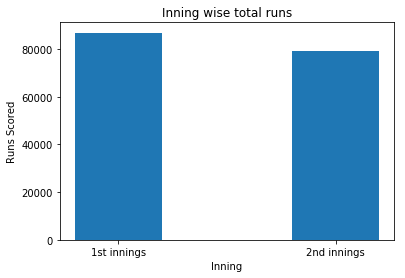

In [198]:
#Vertical bar chart

from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(runs['Inning'],runs['Runs'],width=0.4)
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')

plt.show()

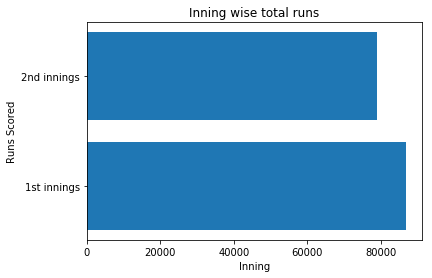

In [197]:
#horizontal bar chart
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.barh(runs['Inning'],runs['Runs'])
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')

plt.show()

In [200]:
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

In [202]:
#PS2-Top 10 batsmen based on runs
run_and_batsman=ball[['Striker_Id','Batsman_Scored']]

In [204]:
df1=run_and_batsman.groupby('Striker_Id')['Batsman_Scored'].sum().reset_index()

In [208]:
df1.sort_values(by='Batsman_Scored',ascending=False).head()

,Striker_Id,Batsman_Scored
20,21,4106
7,8,4105
56,57,3874
39,40,3634
161,162,3447


In [209]:
list(player)

['Player_Id',
 'Player_Name',
 'DOB',
 'Batting_Hand',
 'Bowling_Skill',
 'Country',
 'Is_Umpire',
 'Unnamed: 7']

In [215]:
top_10_batsmen=pd.merge(df1,player,right_on='Player_Id',left_on='Striker_Id')
top_10_batsmen.sort_values(by='Batsman_Scored',ascending=False).head(10)

,Striker_Id,Batsman_Scored,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
20,21,4106,21,SK Raina,1986-11-27,Left_Hand,Right-arm offbreak,India,0,NaN
7,8,4105,8,V Kohli,1988-11-05,Right_Hand,Right-arm medium,India,0,NaN
56,57,3874,57,RG Sharma,1987-04-30,Right_Hand,Right-arm offbreak,India,0,NaN
39,40,3634,40,G Gambhir,1981-10-14,Left_Hand,Legbreak,India,0,NaN
161,162,3447,162,CH Gayle,1979-09-21,Left_Hand,Right-arm offbreak,West Indies,0,NaN
45,46,3390,46,RV Uthappa,1985-11-11,Right_Hand,Right-arm medium,India,0,NaN
186,187,3373,187,DA Warner,1986-10-27,Left_Hand,Legbreak,Australia,0,NaN
109,110,3270,110,AB de Villiers,1984-02-17,Right_Hand,Right-arm medium,South Africa,0,NaN
19,20,3270,20,MS Dhoni,1981-07-07,Right_Hand,Right-arm medium,India,0,NaN
41,42,3082,42,S Dhawan,1985-12-05,Left_Hand,Right-arm offbreak,India,0,NaN


In [216]:
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

In [229]:
#PS3-Top bowlers based on extra runs
bowler_list=ball[ball['Extra_Runs']!=' '].groupby('Bowler_Id')['Extra_Runs'].sum().reset_index()
bowler_list=pd.merge(bowler_list,player,right_on='Player_Id',left_on='Bowler_Id')
bowler_list.sort_values(by='Extra_Runs',ascending=False).head(10)

,Bowler_Id,Extra_Runs,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
124,194,204,194,SL Malinga,1983-08-28,Right_Hand,Right-arm fast,Sri Lanka,0,NaN
8,14,169,14,P Kumar,1986-10-02,Right_Hand,Right-arm medium,India,0,NaN
36,61,152,61,RP Singh,1985-12-06,Right_Hand,Left-arm fast-medium,India,0,NaN
17,32,147,32,SR Watson,1981-06-17,Right_Hand,Right-arm fast-medium,Australia,0,NaN
58,94,141,94,DW Steyn,1983-06-27,Right_Hand,Right-arm fast,South Africa,0,NaN
52,84,140,84,I Sharma,1988-09-02,Right_Hand,Right-arm fast-medium,India,0,NaN
28,50,132,50,Harbhajan Singh,1980-07-03,Right_Hand,Right-arm offbreak,India,0,NaN
9,15,128,15,Z Khan,1978-10-07,Right_Hand,Left-arm fast-medium,India,0,NaN
66,109,122,109,JA Morkel,1981-06-10,Left_Hand,Right-arm medium-fast,South Africa,0,NaN
42,71,120,71,DJ Bravo,1983-10-07,Right_Hand,Right-arm medium-fast,West Indies,0,NaN


In [251]:
#PS4-Top 3 batsman based on centuries
top_batsmen=ball.groupby(['Striker_Id','Match_Id'])['Batsman_Scored'].sum().reset_index()
top_batsmen=top_batsmen[top_batsmen['Batsman_Scored']>99]
top_batsmen=top_batsmen.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
top_batsmen=pd.merge(top_batsmen,player,right_on='Player_Id',left_on='Striker_Id')
top_batsmen.sort_values(by='Batsman_Scored',ascending=False).head(10)

,Striker_Id,Batsman_Scored,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
19,162,5,162,CH Gayle,1979-09-21,Left_Hand,Right-arm offbreak,West Indies,0,NaN
1,8,4,8,V Kohli,1988-11-05,Right_Hand,Right-arm medium,India,0,NaN
16,110,3,110,AB de Villiers,1984-02-17,Right_Hand,Right-arm medium,South Africa,0,NaN
0,2,2,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN
5,32,2,32,SR Watson,1981-06-17,Right_Hand,Right-arm fast-medium,Australia,0,NaN
6,41,2,41,V Sehwag,1978-10-20,Right_Hand,Right-arm offbreak,India,0,NaN
22,187,2,187,DA Warner,1986-10-27,Left_Hand,Legbreak,Australia,0,NaN
8,53,2,53,AC Gilchrist,1971-11-14,Left_Hand,Right-arm offbreak,Australia,0,NaN
21,185,2,185,M Vijay,1984-04-01,Right_Hand,Right-arm offbreak,India,0,NaN
25,355,1,355,Q de Kock,1992-12-17,Left_Hand,NaN,South Africa,0,NaN


In [262]:
#PS5-Are right handed batsman dominating IPL
right_left=ball[['Striker_Id','Batsman_Scored']].groupby('Striker_Id')['Batsman_Scored'].sum().reset_index()
right_left=pd.merge(right_left,player,left_on='Striker_Id',right_on='Player_Id')
right_left=right_left[['Batsman_Scored','Batting_Hand']]
right_left=right_left.groupby('Batting_Hand')['Batsman_Scored'].sum().reset_index()
right_left

,Batting_Hand,Batsman_Scored
0,Left_Hand,54462
1,Right_Hand,111488


In [28]:
#Decision after winnning toss
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [41]:
#Use size function for counting
toss=match.groupby('Toss_Decision').size().reset_index()
toss=toss.rename(columns={0:'No.of.matches'})
toss

,Toss_Decision,No.of.matches
0,bat,262
1,field,315


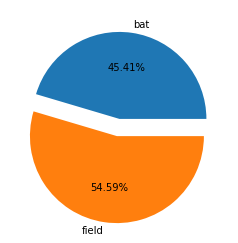

In [49]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[20,20]
%matplotlib inline
#ex=(0,0.2) #For 2 slices
plt.pie(toss['No.of.matches'],labels=toss['Toss_Decision'],autopct="%.2f%%",explode=(0,0.2))
plt.show()

In [48]:
#Explode,pct-distance,labeldistance
#labeldistance:Distance of the labels from the centre of the pie.Default radius of the pie is 1 unit
#radius=2 parameter to change the radius value
#pctdistance:Distance of the percentage values from the centre of the pie
#explode:(0,0,0.2) for 3rd slice

In [50]:
list(ball)

['Match_Id',
 'Season_Id',
 'Innings_Id',
 'Over_Id',
 'Ball_Id',
 'Team_Batting_Id',
 'Team_Bowling_Id',
 'Striker_Id',
 'Striker_Batting_Position',
 'Non_Striker_Id',
 'Bowler_Id',
 'Batsman_Scored',
 'Extra_Type',
 'Extra_Runs',
 'Player_dissimal_Id',
 'Dissimal_Type',
 'Fielder_Id']

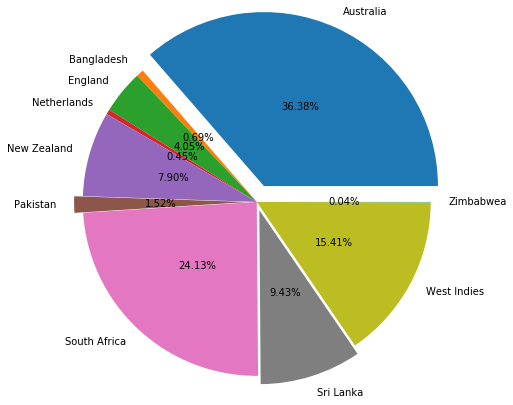

In [84]:
runs_by_country=ball[['Striker_Id','Batsman_Scored']].groupby('Striker_Id')['Batsman_Scored'].sum().reset_index()
runs_by_country=pd.merge(runs_by_country,player[['Player_Id','Country']],left_on='Striker_Id',right_on='Player_Id')
runs_by_country=runs_by_country[['Striker_Id', 'Batsman_Scored','Country']]
runs_by_country=runs_by_country.groupby('Country')['Batsman_Scored'].sum().reset_index()
runs_by_country=runs_by_country.rename(columns={'Batsman_Scored':'Runs'})
runs_by_country=runs_by_country[runs_by_country['Country']!='India']
runs_by_country
plt.pie(runs_by_country['Runs'],labels=runs_by_country['Country'],autopct="%.2f%%",explode=(0.2,0,0,0,0,0.1,0,0.1,0,0),radius=2,pctdistance=0.5)
plt.show()

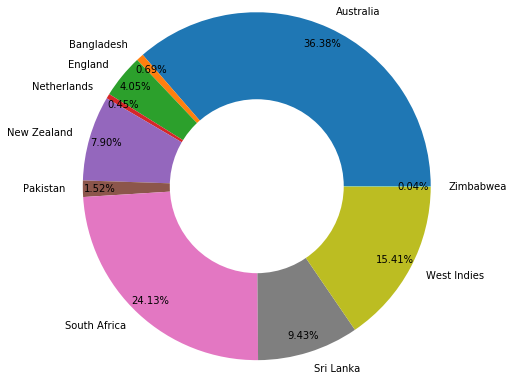

In [98]:
#Create a donut chart
#Create a inner circle with background white and centre-(0,0)

plt.pie(runs_by_country['Runs'],labels=runs_by_country['Country'],autopct="%.2f%%",radius=2,pctdistance=0.9)

centre_circle=plt.Circle((0,0),1,fc='white')
#plt.circle((centre co-ordinates),radius,fill_color)
fig=plt.gcf()#gcf=get current figure ie the pie chart

fig.gca().add_artist(centre_circle) #gca=get current axis ie (0,0).add_artist is used to add one figure on top of th eother

plt.show()